<a href="https://colab.research.google.com/github/Yamaaanm/Yoshiki/blob/main/PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<参考>

1.[PyCaret-HP](https://pycaret.org/create-model/)\
2.[Github](https://github.com/Kazuhito00/PyCaret-Learn)\
3.[スタビジ](https://toukei-lab.com/pycaret)\
4.[Qiita 最速でPyCaretを使ってみた](https://qiita.com/s_fukuzawa/items/5dd40a008dac76595eea)\
5.[PyCaretでクラスタリングをしてみた](https://qiita.com/kotai2003/items/55c4f525ff216ca16800)\
6.[PyTorch 各種ドキュメント翻訳/解説](https://torch.classcat.com/2020/12/17/pycaret-2-2-tutorials-multiclass-classification-mclf101/)

## ・どんなライブラリか / 使い方

「機械学習の一連の操作を自動化」するライブラリ。\
PyCaretは基本的に、scikit-learn、XGBoost、LightGBM、CatBoost、spaCy、Optuna、Hyperopt、Rayなどのいくつかの機械学習ライブラリーとフレームワークのPythonラッパーであり、数百行のコードを数行のコードを書くことで実現できる。\
主にできる事としては以下に分けられる\
1.分類（pycaret.classification）\
2.回帰（pycaret.regression）\
3.クラスタリング（pycaret.clustering）\
4.異常検知（pycare.anomaly）\
5.自然言語処理（pycaret.nlp）\
6.アソシエーション分析（pycaret.arules）


### ・自動的に行われる前処理の内容


1.欠損値の補填\
2.データ型の推定/変換\
3.エンコーディング\
4.train/testのデータ分割\
5.データサンプリング



### ・モデル評価

1.モデルの比較・・・全てのモデルを比較して、それぞれの制度の高い順に表示する\
2.モデルの選択(各自で決める)\
3.ハイパーパラメータチューニング\
4.モデルの可視化\
5.予測

### ・デメリットは？？

1.モデル比較やパラメータチューニングの処理に時間がかかる。\
2.

##・実際のコード

In [ ]:
!pip install pycaret

pycaretは、pycaret.datasetsでデータセットが用意されています。\
以下では、[Github](https://github.com/pycaret/pycaret/tree/master/datasets)を参照し、各データを使っていきます。

### ・分類のサンプル

In [ ]:
from pycaret.datasets import get_data
iris = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


変数の説明は以下です\
sepal_length: Length of がく片 (= Sepal) の長さ\
sepal_width: がく片の幅\
petal_length: 花弁 (= Petal) の長さ\
petal_width: 花弁の幅\
species: 3 クラス (Setosa, Versicolour, Virginica) の一つ、ターゲットカラム

In [ ]:
train = iris.sample(frac=0.8, random_state=1234)
test = iris.drop(train.index)
 
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
 
print('訓練用データ: ' + str(train.shape))
print('評価用データ: ' + str(test.shape))

訓練用データ: (120, 5)
評価用データ: (30, 5)


・前処理

In [ ]:
from pycaret.classification import *
exp = setup(data=train, target = 'species', session_id=123) #デフォルトでtest_size=0.3

,Description,Value
0,session_id,123
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virgi..."
4,Original Data,"(120, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


session_id : 後の再現性のために総ての関数のシードとして分配される擬似乱数\
Target Type : Binary (二値) or Multiclass (多クラス)\
Label Encoded :ラベルエンコーディングが適用されます //Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2.\
Original Data : データセットの元の shape を表示します\
Missing Values : 元のデータに欠損値があるときこれは True として示されます\
Numeric Features : numeric として推論される特徴の数\
Categorical Features : categorical として推論される特徴の数\
Transformed Train Set : 変換された訓練セットの shape を表示します\
Transformed Test Set : 変換されたテスト/hold-out セットの shape を表示します。\
これはセットアップの train_size パラメータを使用して変更可能です。

今回は回帰問題なので「pycaret.regression」を用いました\
分類問題の場合は「pycaret.classification」を指定します。\
setup()を使う事で前処理を完了します。またtargetには目的変数を渡します。

・モデル比較

In [ ]:
best = compare_models(fold=10) #デフォルトが10

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9882,1.0000,0.9889,0.9902,0.9882,0.9824,0.9833,0.020
lda,Linear Discriminant Analysis,0.9882,0.9980,0.9889,0.9902,0.9882,0.9824,0.9833,0.022
lr,Logistic Regression,0.9765,0.9980,0.9756,0.9801,0.9763,0.9646,0.9665,0.648
knn,K Neighbors Classifier,0.9765,0.9939,0.9756,0.9801,0.9763,0.9646,0.9665,0.140
lightgbm,Light Gradient Boosting Machine,0.9647,0.9918,0.9622,0.9700,0.9643,0.9468,0.9497,0.112
rf,Random Forest Classifier,0.9640,0.9976,0.9622,0.9694,0.9636,0.9457,0.9487,0.552
gbc,Gradient Boosting Classifier,0.9640,0.9638,0.9622,0.9694,0.9636,0.9457,0.9487,0.210
dt,Decision Tree Classifier,0.9522,0.9644,0.9511,0.9596,0.9518,0.9281,0.9320,0.016
ada,Ada Boost Classifier,0.9522,0.9843,0.9511,0.9596,0.9518,0.9281,0.9320,0.100
et,Extra Trees Classifier,0.9522,1.0000,0.9511,0.9596,0.9518,0.9281,0.9320,0.502


compare_models()を使う事で準備したデータの70%の訓練データでk分割交差検証法を用いてAccuracyの降順に並べられる。

・モデル作成

In [ ]:
qda = create_model('qda') 
#lda = create_model('lda') #最も精度の高かったアルゴリズムを選びます

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8750,1.0,0.8889,0.9167,0.8750,0.8140,0.8333
4,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000


・モデル調整

デフォルト{optimize=Accuracy}で最適化する。

In [ ]:
qda_tune = tune_model(qda) 
#lda_tune = tune_model(lda) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,1.0,0.8889,0.9167,0.8857,0.8333,0.8492
1,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,1.0,0.8889,0.9167,0.8857,0.8333,0.8492
3,0.8750,1.0,0.8889,0.9167,0.8750,0.8140,0.8333
4,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8750,1.0,0.8333,0.9062,0.8631,0.8049,0.8260
6,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000


・プロット

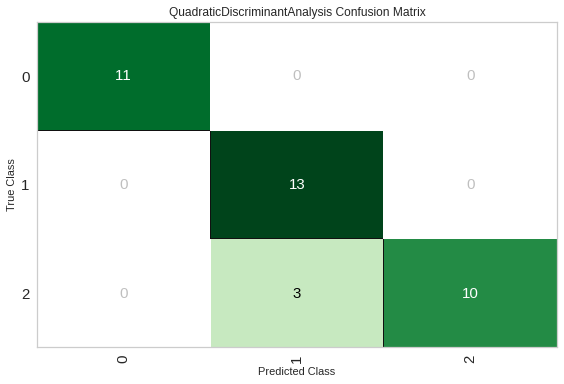

In [ ]:
#混同行列
plot_model(qda_tune, plot = 'confusion_matrix')

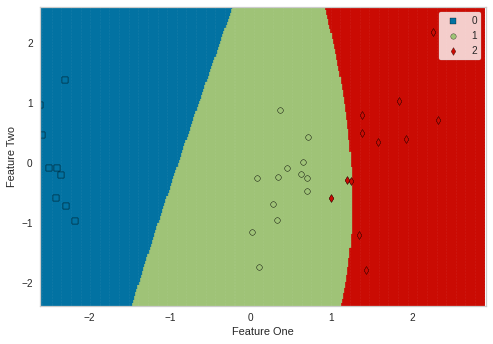

In [ ]:
#決定境界プロット
plot_model(qda_tune, plot='boundary')

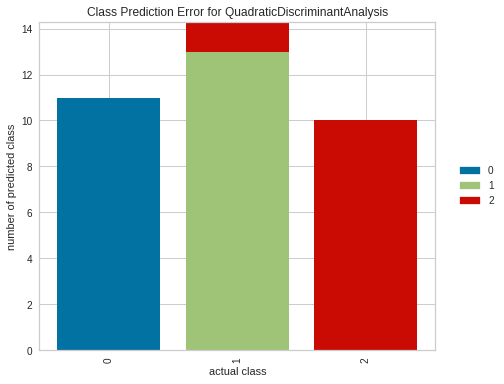

In [ ]:
#予測エラープロット
plot_model(qda_tune, plot = 'error')

In [ ]:
evaluate_model(qda_tune) #一括に可視化できる

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

・訓練用データの中の評価データで予測

In [ ]:
predict_model(qda_tune)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9189,0.9955,0.9231,0.9341,0.9178,0.878,0.8868


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.2,2.7,3.9,1.4,Iris-versicolor,Iris-versicolor,0.9665
1,5.6,2.8,4.9,2.0,Iris-virginica,Iris-virginica,0.7197
2,5.1,3.8,1.6,0.2,Iris-setosa,Iris-setosa,1.0000
3,5.7,3.0,4.2,1.2,Iris-versicolor,Iris-versicolor,0.9749
4,6.2,2.8,4.8,1.8,Iris-virginica,Iris-versicolor,0.5746
5,7.2,3.6,6.1,2.5,Iris-virginica,Iris-virginica,0.9930
6,6.0,2.2,5.0,1.5,Iris-virginica,Iris-versicolor,0.5623
7,5.7,2.5,5.0,2.0,Iris-virginica,Iris-virginica,0.7679
8,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica,0.9888
9,4.8,3.4,1.9,0.2,Iris-setosa,Iris-setosa,1.0000


・モデル確定

In [ ]:
qda_final = finalize_model(qda_tune)

・未見のデータ上で予測

Label は予測で score は予測の確率

In [ ]:
test_predictions = predict_model(qda_final, data=test)
test_predictions

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,1.0000
1,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,1.0000
2,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa,1.0000
3,5.1,3.8,1.5,0.3,Iris-setosa,Iris-setosa,1.0000
4,5.1,3.3,1.7,0.5,Iris-setosa,Iris-setosa,1.0000
5,5.0,3.4,1.6,0.4,Iris-setosa,Iris-setosa,1.0000
6,4.8,3.1,1.6,0.2,Iris-setosa,Iris-setosa,1.0000
7,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
8,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
9,4.4,3.0,1.3,0.2,Iris-setosa,Iris-setosa,1.0000


・モデルセーブ

In [ ]:
save_model(qda_final,'Final qda Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='species')),
                 ('fix_perfect', Remove_100(target='species')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'),

・モデルロード

In [ ]:
saved_qda_final = load_model('Final qda Model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_qda_final, data=test)
new_prediction #test_predictionsと同じ結果

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,1.0000
1,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,1.0000
2,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa,1.0000
3,5.1,3.8,1.5,0.3,Iris-setosa,Iris-setosa,1.0000
4,5.1,3.3,1.7,0.5,Iris-setosa,Iris-setosa,1.0000
5,5.0,3.4,1.6,0.4,Iris-setosa,Iris-setosa,1.0000
6,4.8,3.1,1.6,0.2,Iris-setosa,Iris-setosa,1.0000
7,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
8,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
9,4.4,3.0,1.3,0.2,Iris-setosa,Iris-setosa,1.0000


### ・回帰のサンプル

In [ ]:
from pycaret.datasets import get_data
boston = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


変数の説明は以下です\
crim：町ごとの一人当たりの犯罪率\
zn：宅地の比率が25,000平方フィートを超える敷地に区画されている\
indus：町当たりの非小売業エーカーの割合\
chas：	チャーリーズ川ダミー変数（川の境界にある場合は1、それ以外の場合は0）\
nox：一酸化窒素濃度（1000万分の1）\
rm：1住戸あたりの平均部屋数\
age：1940年以前に建設された所有占有ユニットの年齢比率\
dis：5つのボストンの雇用センターまでの加重距離\
rad：ラジアルハイウェイへのアクセス可能性の指標\
tax：10,000ドルあたりの税全額固定資産税率\
ptratio：生徒教師の比率\
black：町における黒人の割合\
lstat：人口当たり地位が低い率\
medv：1000ドルでの所有者居住住宅の中央値

In [ ]:
train = boston.sample(frac=0.9, random_state=1234)
test = boston.drop(train.index)
 
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
 
print('訓練用データ: ' + str(train.shape))
print('評価用データ: ' + str(test.shape))

訓練用データ: (455, 14)
評価用データ: (51, 14)


・前処理

In [ ]:
from pycaret.regression import *
exp1 = setup(boston, target = 'medv')

,Description,Value
0,session_id,6448
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


compare_models()を使う事で準備したデータの70%の訓練データでk分割交差検証法を用いて、R2の降順に並べられる。

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0015,8.1010,2.7816,0.8884,0.1373,0.1074,0.454
gbr,Gradient Boosting Regressor,2.1623,9.1074,2.9489,0.8760,0.1486,0.1176,0.106
rf,Random Forest Regressor,2.2291,10.6776,3.1768,0.8564,0.1520,0.1186,0.525
lightgbm,Light Gradient Boosting Machine,2.4269,11.8682,3.3769,0.8410,0.1577,0.1249,0.077
ada,AdaBoost Regressor,2.6293,13.1419,3.5679,0.8204,0.1728,0.1411,0.105
dt,Decision Tree Regressor,2.9674,17.6921,4.1694,0.7423,0.2011,0.1545,0.020
ridge,Ridge Regression,3.1635,21.0708,4.4369,0.7266,0.2468,0.1647,0.017
br,Bayesian Ridge,3.1703,21.4451,4.4682,0.7255,0.2499,0.1653,0.016
lr,Linear Regression,3.1797,21.0641,4.4476,0.7240,0.2454,0.1644,0.298
lasso,Lasso Regression,3.6181,27.7503,5.1182,0.6493,0.2691,0.1790,0.019


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6448, verbose=0, warm_start=False)

In [ ]:
et = create_model('et') #最も精度の高かったアルゴリズム

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0205,7.7429,2.7826,0.8937,0.1254,0.0965
1,2.4372,12.4218,3.5245,0.8929,0.1293,0.0981
2,2.7782,17.4833,4.1813,0.8183,0.2228,0.1797
3,1.7088,5.3283,2.3083,0.8747,0.1463,0.1081
4,1.6970,5.0864,2.2553,0.9488,0.1185,0.0935
5,1.8766,6.8417,2.6157,0.9321,0.1358,0.1054
6,1.7398,5.7452,2.3969,0.9294,0.1223,0.0969
7,1.8919,6.5640,2.5620,0.8364,0.1371,0.1117
8,1.7725,4.7843,2.1873,0.8839,0.0878,0.0773
9,2.0930,9.0123,3.0021,0.8737,0.1476,0.1068


In [ ]:
et_tune = tune_model(et, optimize ='RMSE') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.0474,7.4448,2.7285,0.8978,0.1189,0.0967
1,3.5201,31.8220,5.6411,0.7257,0.1796,0.1230
2,3.2735,28.9843,5.3837,0.6988,0.2391,0.1856
3,2.1377,7.2534,2.6932,0.8294,0.1779,0.1398
4,2.7581,25.1418,5.0142,0.7471,0.1945,0.1381
5,2.4360,11.1431,3.3381,0.8895,0.1625,0.1316
6,2.3811,10.4442,3.2318,0.8717,0.1596,0.1323
7,2.2362,6.7771,2.6033,0.8310,0.1408,0.1280
8,1.6417,4.3418,2.0837,0.8946,0.0944,0.0744
9,2.4263,10.8457,3.2933,0.8481,0.1586,0.1273


・プロット

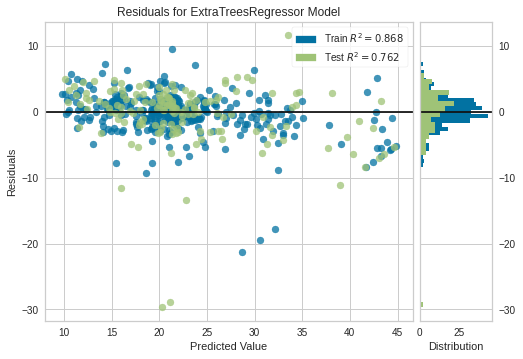

In [ ]:
plot_model(et_tune) 

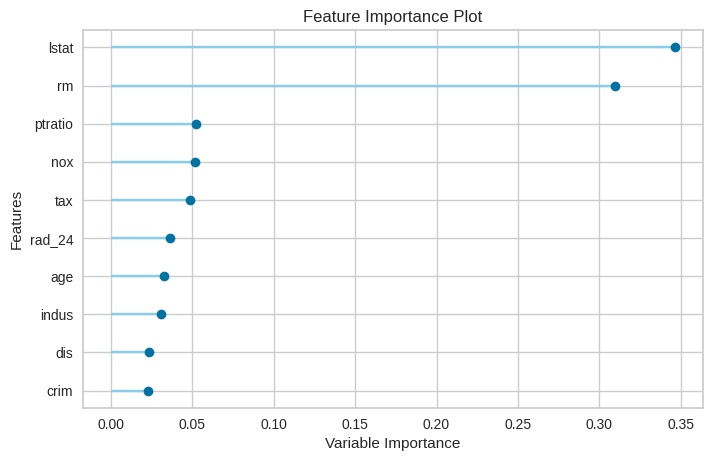

In [ ]:
plot_model(et_tune, plot='feature') #変数重要度

In [ ]:
evaluate_model(et_tune) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

AUC・・・ROC曲線で描写する\
Confusion Matrix・・・混同行列 / ヒートマップで表示する\
Error・・・実際のクラスごとに、どのように予測したのか表示する\
Dicision Boundary・・・Treeベースの境界が確認できる\
Threshold・・・閾値毎のprecison/recall/f値を表示する\
Learning Curve・・・学習曲線を表示する。TrainとCVセットに対してスコアが表示されるので、Underfittng/Overfittingの判断に利用できる。\
Validation Curve・・・モデル毎の正則化パラメータに対する、Trainセット／CVセットのスコアが表示される。
Feature Importance・・・このモデルがどの特徴量を重要視しているか？が表示される。


**・Dicision Boundary** 

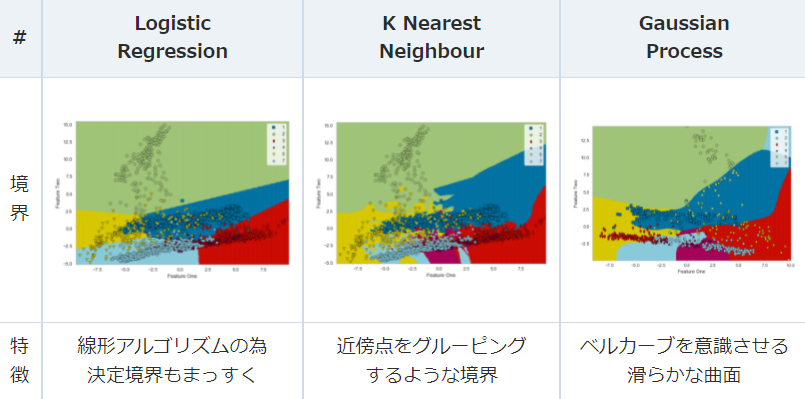

**・Validation Curve**

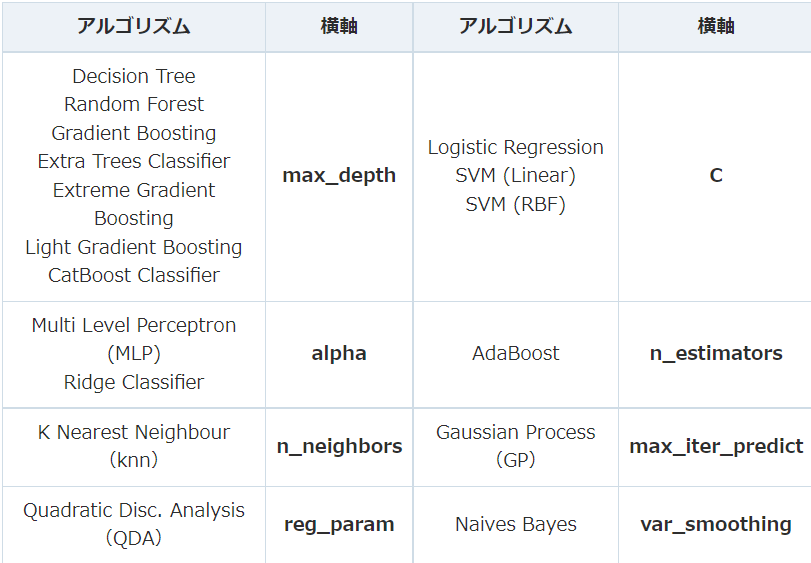

In [ ]:
et_predict = predict_model(et_tune) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,3.0274,23.4666,4.8442,0.7624,0.1867,0.141


・未見のデータで予測

In [ ]:
et_final = finalize_model(et_tune)

In [ ]:
test_predictions = predict_model(et_final, data=test)
test_predictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.055589
1,0.63796,0.0,8.14,0,0.5380,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2,20.435588
2,1.13081,0.0,8.14,0,0.5380,5.713,94.1,4.2330,4,307,21.0,360.17,22.60,12.7,15.391765
3,0.08873,21.0,5.64,0,0.4390,5.963,45.7,6.8147,4,243,16.8,395.56,13.45,19.7,20.460000
4,0.04981,21.0,5.64,0,0.4390,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4,22.127647
5,0.10153,0.0,12.83,0,0.4370,6.279,74.5,4.0522,5,398,18.7,373.66,11.97,20.0,21.246177
6,0.13117,0.0,8.56,0,0.5200,6.127,85.2,2.1224,5,384,20.9,387.69,14.09,20.4,19.915588
7,0.06899,0.0,25.65,0,0.5810,5.870,69.7,2.2577,2,188,19.1,389.15,14.37,22.0,20.208824
8,0.32543,0.0,21.89,0,0.6240,6.431,98.8,1.8125,4,437,21.2,396.90,15.39,18.0,18.191765
9,0.54452,0.0,21.89,0,0.6240,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,17.8,16.811176


### ・クラスタリング

In [ ]:
from pycaret.datasets import get_data
mice = get_data('mice') 

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

Pandasのprofile_report()を使い、データの中身を見てみます。\
少し時間がかかる。

In [ ]:
import pandas_profiling
mice.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train = mice.sample(frac=0.95, random_state=1234)
test = mice.drop(train.index)
 
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
 
print('訓練用データ: ' + str(train.shape))
print('評価用データ: ' + str(test.shape))

訓練用データ: (1026, 82)
評価用データ: (54, 82)


・前処理

In [ ]:
from pycaret.clustering import * #クラスタリング用インポート
exp = setup(train, normalize = True,
            ignore_features = ['MouseID'], #MouseIDは個体のID値であり、無視するよう指定
            session_id =123)

,Description,Value
0,session_id,123
1,Original Data,"(1026, 82)"
2,Missing Values,True
3,Numeric Features,77
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1026, 91)"
9,CPU Jobs,-1


k-means, ap, meanshiftなど様々あるが、ここでは、k-means法を使う。詳細は[こちら](https://pycaret.org/create-model/)を参照。

In [ ]:
kmeans = create_model('kmeans',num_clusters=4) #クラスタ数のデフォルトは4
print(kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1188,139.0775,2.0515,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


・モデルの割り当て

In [ ]:
kmean_results =  assign_model(kmeans)
kmean_results.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Cluster
0,3502_8,0.252851,0.529386,0.357456,2.478509,4.535307,0.310965,0.259649,3.799123,0.254605,1.507675,0.322149,0.397588,0.348026,0.357675,0.906360,0.846053,1.794079,1.400877,0.487939,0.891886,0.307018,0.483114,0.227632,1.203947,2.356798,1.206798,0.291447,0.326974,0.844079,0.215789,0.398465,2.453509,0.756579,0.548246,0.499561,0.886404,0.691886,0.446272,0.680921,...,0.429605,0.188735,0.948550,0.160508,1.684629,0.290608,0.354119,1.332948,0.180267,0.176546,0.177701,0.144855,0.171286,0.188992,0.215807,0.124198,0.196048,0.125225,0.546061,0.284706,1.575058,2.474468,0.180908,1.525661,0.825763,0.227354,NaN,0.154991,0.144855,0.116372,0.500385,0.159610,0.202848,NaN,1.075571,Ts65Dn,Memantine,S/C,t-SC-m,Cluster 3
1,322_3,0.395358,0.576313,0.342568,2.356046,5.326220,0.207413,0.168601,3.511544,0.181580,1.416199,0.663297,0.338325,0.298390,0.242731,0.902284,0.985648,1.818420,1.302758,0.342693,0.823662,0.331087,0.360539,0.157494,1.453638,3.616623,1.140771,0.238737,0.268813,0.758393,0.141021,0.391364,2.227755,0.319231,0.466242,0.360290,0.765756,0.628728,0.413079,0.588294,...,0.158492,0.218308,1.231375,0.159688,0.874314,0.367239,0.435677,1.755775,0.111608,0.162504,0.202570,0.134710,0.174126,0.172755,0.205458,0.123881,0.247257,0.150736,0.686977,0.300751,1.978559,2.327462,0.147199,1.274978,0.850347,0.238161,NaN,0.133049,0.134710,0.122870,0.493719,NaN,NaN,NaN,1.723145,Control,Memantine,C/S,c-CS-m,Cluster 1
2,3500_6,0.299141,0.492653,0.275021,2.220128,3.923343,0.210147,0.171334,5.799972,0.187552,1.171334,0.372332,0.338647,0.285833,0.280704,0.844330,1.011644,1.591489,1.197533,0.433324,0.646382,0.204879,0.312725,0.175076,1.157887,2.163709,1.016634,0.213058,0.249515,0.646798,0.138342,0.394649,2.200305,0.600499,0.433601,0.444691,0.813141,0.580122,0.365401,0.675353,...,0.336706,0.176268,1.058296,0.149879,1.727147,0.278976,0.416006,1.470162,0.159969,0.173077,0.190497,0.126078,0.154105,0.199810,0.175492,0.110900,0.275181,0.148931,0.596499,0.269662,1.810624,2.583477,0.167213,1.396257,0.830717,0.195843,0.170835,0.139703,0.126078,0.146775,0.492929,0.169714,0.222318,0.217575,1.104691,Control,Memantine,S/C,c-SC-m,Cluster 3
3,361_5,0.466667,0.689844,0.390885,2.670313,5.059375,0.238802,0.186849,4.159635,0.220312,1.363542,0.711979,0.357422,0.406250,0.285677,0.976823,0.945833,1.845443,2.624609,0.527734,0.704297,0.404948,0.362630,0.182292,1.328255,2.960026,1.484245,0.283724,0.315104,0.898438,0.167578,0.436979,2.572917,0.338411,0.475521,0.387630,0.763151,0.559375,0.381510,0.594531,...,0.380469,0.206738,0.938062,0.173677,2.065634,0.328800,0.425263,1.915812,0.147102,0.156100,0.195787,0.113413,0.153798,0.184976,0.162517,0.120458,0.249564,0.128897,0.528074,0.322104,1.555346,2.528841,0.145498,1.304457,0.932064,0.228290,0.150031,0.109925,0.113413,0.110344,0.530027,0.118016,0.148497,0.149264,2.064797,Ts65Dn,Memantine,C/S,t-CS-m,Cluster 1
4,3503_2,0.306760,0.463237,0.309184,2.522354,5.093994,0.226501,0.172502,5.725290,0.194991,1.502559,0.381228,0.326017,0.322111,0.271209,0.934420,1.072179,1.882036,1.362106,0.379343,0.705090,0.248721,0.344869,0.141395,1.251010,2.299623,1.126986,0.225828,0.241314,0.631430,0.130083,0.363453,2.495825,0.493267,0.469432,0.515351,0.959467,0.663345,0.464315,0.630218,...,0.519795,0.186331,0.939150,0.155941,1.674533,0.257895,0.246831,1.365871,0.197535,0.196835,0.213991,0.120300,0.130733,0.187242,0.170226,0.122470,0.261676,0.150410,0.396821,0.267768,

・プロット

In [ ]:
plot_model(kmeans)

**・クラスター数の決定**

1.エルボー法・・SSEを計算し、クラスタ数を推定する手法\
2.シルエット分析・・各クラスターにどれくらいうまくグループしているか

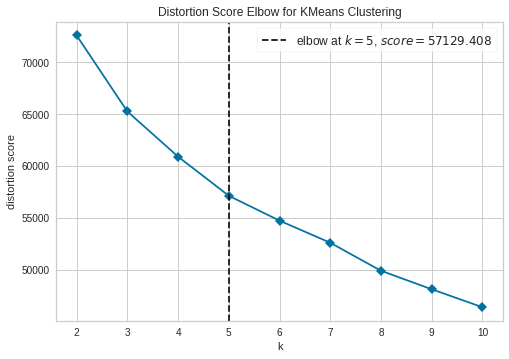

In [ ]:
#エルボー法
plot_model(kmeans_model, plot='elbow')

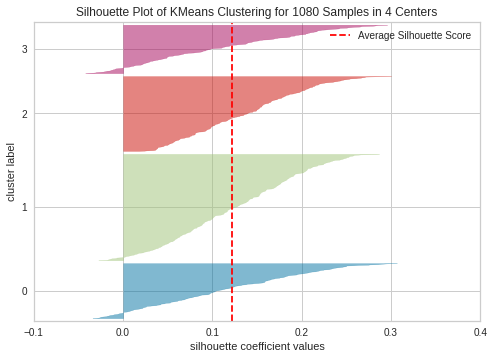

In [ ]:
#シルエット分析
plot_model(kmeans_model, plot='silhouette')

・予測

In [ ]:
predictions = predict_model(kmeans,data=test)
predictions.head() #classとCluster比較

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Cluster
0,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m,Cluster 2
1,320_1,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,1.022813,0.348667,0.348291,0.245963,1.083177,1.008637,2.128990,1.603736,0.361904,1.028539,0.534548,0.400676,0.175836,2.407811,4.643823,1.533421,0.271217,0.322475,0.887627,0.168044,0.442922,2.747559,0.358149,0.537646,0.383590,0.799380,0.645043,0.538303,0.709350,...,0.214514,0.248877,1.223802,0.172713,0.605805,0.355595,0.676687,1.951281,0.135249,0.150501,0.202873,0.148773,0.185794,0.219754,0.353719,0.119354,0.220791,0.124735,0.571351,0.303668,1.788785,2.221383,0.148823,1.180117,0.833704,0.211462,0.127400,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine,C/S,c-CS-m,Cluster 1
2,320_12,0.516538,0.737479,0.383670,2.624646,5.601210,0.259119,0.183897,2.758080,0.208278,1.864109,0.795880,0.360990,0.371763,0.298998,0.960121,0.812134,1.857872,1.997732,0.428841,0.889624,0.467775,0.443772,0.207144,1.443961,3.433566,1.435267,0.295785,0.307125,0.801928,0.183519,0.425817,2.207900,0.399735,0.593650,0.475146,0.856171,0.815347,0.508600,0.725005,...,0.216594,0.194163,0.990308,0.179956,0.780727,0.338656,0.442952,1.828414,0.115529,0.195154,0.219273,0.129846,0.185352,0.190969,0.235793,0.137555,0.174890,0.102313,0.493722,0.331057,1.406388,2.081278,0.166189,1.375330,0.867841,0.225881,0.176872,0.162775,0.129846,0.121586,0.532930,0.160683,0.213326,NaN,1.585793,Control,Memantine,C/S,c-CS-m,Cluster 1
3,321_1,0.560614,0.763028,0.402962,2.933516,6.317279,0.192320,0.167636,1.892485,0.198354,1.730444,0.832474,0.333297,0.324301,0.245091,1.051563,0.864399,2.129457,1.586725,0.348766,0.948546,0.398793,0.382447,0.160395,2.046078,4.324520,1.450247,0.256610,0.281953,0.869995,0.151728,0.414811,2.662315,0.337356,0.509600,0.391772,0.794624,0.636314,0.485354,0.699945,...,0.183105,0.247358,1.327949,0.177516,0.900372,0.349267,0.534110,2.181300,0.106714,0.170250,0.205741,0.149351,0.200216,0.206882,0.297862,0.130555,0.237149,0.137581,0.606834,0.311554,1.926976,2.495856,0.156618,1.244535,0.926796,0.219493,NaN,0.133978,0.149351,NaN,0.589959,0.120166,0.170250,NaN,1.680399,Control,Memantine,C/S,c-CS-m,Cluster 1
4,3507_12,0.369990,0.516444,0.310123,2.229188,3.496403,0.247945,0.200925,2.174203,0.206578,1.282374,0.508736,0.329651,0.306526,0.265930,0.794450,0.588129,1.474820,1.054471,0.421634,0.614594,0.332991,0.398767,0.189620,0.926516,2.477903,1.065519,0.284430,0.256166,0.698613,0.173947,0.386948,1.926773,0.340185,0.493063,0.442189,0.780319,0.574255,0.345581,0.589671,...,0.204265,0.168325,0.925866,0.162388,1.008184,0.310976,0.476091,1.019095,0.108793,0.159178,0.144416,0.126284,0.162388,0.222401,0.178273,0.131258,0.295732,0.141849,0.588254,0.31530

### ・異常検知のサンプル

教師なしの異常検知を行う。

In [ ]:
from pycaret.datasets import get_data
mice = get_data('mice') #データセットのインポート

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [ ]:
train = mice.sample(frac=0.95, random_state=1234)
test = mice.drop(train.index)
 
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
 
print('訓練用データ: ' + str(train.shape))
print('評価用データ: ' + str(test.shape))

訓練用データ: (1026, 82)
評価用データ: (54, 82)


・前処理

In [ ]:
from pycaret.anomaly import * #異常検知用インポート
ano = setup(train, 
            normalize = True,
            ignore_features = ['MouseID'],
            session_id =123) 

,Description,Value
0,session_id,123
1,Original Data,"(1026, 82)"
2,Missing Values,True
3,Numeric Features,77
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1026, 91)"
9,CPU Jobs,-1


・モデル作成

In [ ]:
#モデル例1
iforest = create_model('iforest') #Isolation Forest
#モデル例2
knn = create_model('knn') #K近傍

**・モデルの割り当て**\
末尾にLabel列とScore列が追加される。\
Labal(Anomaly)=0(正常),=1(異常)\
Score(Anomaly_Score)：外れ値の場合はより大きなスコアになる

In [ ]:
knn_results = assign_model(knn)
knn_results.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Anomaly,Anomaly_Score
0,3502_8,0.252851,0.529386,0.357456,2.478509,4.535307,0.310965,0.259649,3.799123,0.254605,1.507675,0.322149,0.397588,0.348026,0.357675,0.906360,0.846053,1.794079,1.400877,0.487939,0.891886,0.307018,0.483114,0.227632,1.203947,2.356798,1.206798,0.291447,0.326974,0.844079,0.215789,0.398465,2.453509,0.756579,0.548246,0.499561,0.886404,0.691886,0.446272,0.680921,...,0.188735,0.948550,0.160508,1.684629,0.290608,0.354119,1.332948,0.180267,0.176546,0.177701,0.144855,0.171286,0.188992,0.215807,0.124198,0.196048,0.125225,0.546061,0.284706,1.575058,2.474468,0.180908,1.525661,0.825763,0.227354,NaN,0.154991,0.144855,0.116372,0.500385,0.159610,0.202848,NaN,1.075571,Ts65Dn,Memantine,S/C,t-SC-m,0,4.650315
1,322_3,0.395358,0.576313,0.342568,2.356046,5.326220,0.207413,0.168601,3.511544,0.181580,1.416199,0.663297,0.338325,0.298390,0.242731,0.902284,0.985648,1.818420,1.302758,0.342693,0.823662,0.331087,0.360539,0.157494,1.453638,3.616623,1.140771,0.238737,0.268813,0.758393,0.141021,0.391364,2.227755,0.319231,0.466242,0.360290,0.765756,0.628728,0.413079,0.588294,...,0.218308,1.231375,0.159688,0.874314,0.367239,0.435677,1.755775,0.111608,0.162504,0.202570,0.134710,0.174126,0.172755,0.205458,0.123881,0.247257,0.150736,0.686977,0.300751,1.978559,2.327462,0.147199,1.274978,0.850347,0.238161,NaN,0.133049,0.134710,0.122870,0.493719,NaN,NaN,NaN,1.723145,Control,Memantine,C/S,c-CS-m,0,3.712938
2,3500_6,0.299141,0.492653,0.275021,2.220128,3.923343,0.210147,0.171334,5.799972,0.187552,1.171334,0.372332,0.338647,0.285833,0.280704,0.844330,1.011644,1.591489,1.197533,0.433324,0.646382,0.204879,0.312725,0.175076,1.157887,2.163709,1.016634,0.213058,0.249515,0.646798,0.138342,0.394649,2.200305,0.600499,0.433601,0.444691,0.813141,0.580122,0.365401,0.675353,...,0.176268,1.058296,0.149879,1.727147,0.278976,0.416006,1.470162,0.159969,0.173077,0.190497,0.126078,0.154105,0.199810,0.175492,0.110900,0.275181,0.148931,0.596499,0.269662,1.810624,2.583477,0.167213,1.396257,0.830717,0.195843,0.170835,0.139703,0.126078,0.146775,0.492929,0.169714,0.222318,0.217575,1.104691,Control,Memantine,S/C,c-SC-m,0,3.627878
3,361_5,0.466667,0.689844,0.390885,2.670313,5.059375,0.238802,0.186849,4.159635,0.220312,1.363542,0.711979,0.357422,0.406250,0.285677,0.976823,0.945833,1.845443,2.624609,0.527734,0.704297,0.404948,0.362630,0.182292,1.328255,2.960026,1.484245,0.283724,0.315104,0.898438,0.167578,0.436979,2.572917,0.338411,0.475521,0.387630,0.763151,0.559375,0.381510,0.594531,...,0.206738,0.938062,0.173677,2.065634,0.328800,0.425263,1.915812,0.147102,0.156100,0.195787,0.113413,0.153798,0.184976,0.162517,0.120458,0.249564,0.128897,0.528074,0.322104,1.555346,2.528841,0.145498,1.304457,0.932064,0.228290,0.150031,0.109925,0.113413,0.110344,0.530027,0.118016,0.148497,0.149264,2.064797,Ts65Dn,Memantine,C/S,t-CS-m,0,4.103604
4,3503_2,0.306760,0.463237,0.309184,2.522354,5.093994,0.226501,0.172502,5.725290,0.194991,1.502559,0.381228,0.326017,0.322111,0.271209,0.934420,1.072179,1.882036,1.362106,0.379343,0.705090,0.248721,0.344869,0.141395,1.251010,2.299623,1.126986,0.225828,0.241314,0.631430,0.130083,0.363453,2.495825,0.493267,0.469432,0.515351,0.959467,0.663345,0.464315,0.630218,...,0.186331,0.939150,0.155941,1.674533,0.257895,0.246831,1.365871,0.197535,0.196835,0.213991,0.120300,0.130733,0.187242,0.170226,0.122470,0.261676,0.150410,0.396821,0.267768,1.327148,2.171136,0.154961,1.400812,

・プロット（次元削減）

In [ ]:
plot_model(knn) #t-SNE

In [ ]:
plot_model(knn, plot='umap')

・予測

In [ ]:
predictions = predict_model(iforest_model, test)
predictions.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Anomaly,Anomaly_Score
0,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m,0,-0.088438
1,320_1,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,1.022813,0.348667,0.348291,0.245963,1.083177,1.008637,2.128990,1.603736,0.361904,1.028539,0.534548,0.400676,0.175836,2.407811,4.643823,1.533421,0.271217,0.322475,0.887627,0.168044,0.442922,2.747559,0.358149,0.537646,0.383590,0.799380,0.645043,0.538303,0.709350,...,0.248877,1.223802,0.172713,0.605805,0.355595,0.676687,1.951281,0.135249,0.150501,0.202873,0.148773,0.185794,0.219754,0.353719,0.119354,0.220791,0.124735,0.571351,0.303668,1.788785,2.221383,0.148823,1.180117,0.833704,0.211462,0.127400,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine,C/S,c-CS-m,0,-0.010206
2,320_12,0.516538,0.737479,0.383670,2.624646,5.601210,0.259119,0.183897,2.758080,0.208278,1.864109,0.795880,0.360990,0.371763,0.298998,0.960121,0.812134,1.857872,1.997732,0.428841,0.889624,0.467775,0.443772,0.207144,1.443961,3.433566,1.435267,0.295785,0.307125,0.801928,0.183519,0.425817,2.207900,0.399735,0.593650,0.475146,0.856171,0.815347,0.508600,0.725005,...,0.194163,0.990308,0.179956,0.780727,0.338656,0.442952,1.828414,0.115529,0.195154,0.219273,0.129846,0.185352,0.190969,0.235793,0.137555,0.174890,0.102313,0.493722,0.331057,1.406388,2.081278,0.166189,1.375330,0.867841,0.225881,0.176872,0.162775,0.129846,0.121586,0.532930,0.160683,0.213326,NaN,1.585793,Control,Memantine,C/S,c-CS-m,0,-0.025710
3,321_1,0.560614,0.763028,0.402962,2.933516,6.317279,0.192320,0.167636,1.892485,0.198354,1.730444,0.832474,0.333297,0.324301,0.245091,1.051563,0.864399,2.129457,1.586725,0.348766,0.948546,0.398793,0.382447,0.160395,2.046078,4.324520,1.450247,0.256610,0.281953,0.869995,0.151728,0.414811,2.662315,0.337356,0.509600,0.391772,0.794624,0.636314,0.485354,0.699945,...,0.247358,1.327949,0.177516,0.900372,0.349267,0.534110,2.181300,0.106714,0.170250,0.205741,0.149351,0.200216,0.206882,0.297862,0.130555,0.237149,0.137581,0.606834,0.311554,1.926976,2.495856,0.156618,1.244535,0.926796,0.219493,NaN,0.133978,0.149351,NaN,0.589959,0.120166,0.170250,NaN,1.680399,Control,Memantine,C/S,c-CS-m,0,-0.026117
4,3507_12,0.369990,0.516444,0.310123,2.229188,3.496403,0.247945,0.200925,2.174203,0.206578,1.282374,0.508736,0.329651,0.306526,0.265930,0.794450,0.588129,1.474820,1.054471,0.421634,0.614594,0.332991,0.398767,0.189620,0.926516,2.477903,1.065519,0.284430,0.256166,0.698613,0.173947,0.386948,1.926773,0.340185,0.493063,0.442189,0.780319,0.574255,0.345581,0.589671,...,0.168325,0.925866,0.162388,1.008184,0.310976,0.476091,1.019095,0.108793,0.159178,0.144416,0.126284,0.162388,0.222401,0.178273,0.131258,0.295732,0.141849,0.588254,0.315308,1.606386,2.315308,0.178755,1.2

### ・自然言語処理のサンプル

データセット：Kiva Microfundsは、個人が世界中の低所得の起業家や学生にお金を貸せるようにする非営利団体のデータ\
以下のようなデータが含まれます。\
country：借り手の国\
en：ローンを申請したときの借り手の事情\
gender：性別（M=男性、F=女性）\
loan_amount：支払われたローンの金額\
nonpayment：貸し手の種類\
Lender=Kiva Webサイトの個人登録ユーザー\
partner= Kivaと協力してローンを見つけて資金を提供するマイクロファイナンス機関\
sector：借り手の職種\
status：ローンのステータス（1=デフォルト、0=返済済み）

In [ ]:
from pycaret.datasets import get_data
kiva = get_data('kiva') #データセットのインポート

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


・前処理

In [ ]:
from pycaret.nlp import * #自然言語処理用インポート
nlp1 = setup(data = kiva, target = 'en') 

Description,Value
session_id,6309
Documents,6818
Vocab Size,10671
Custom Stopwords,False


**行われる前処理**
* 数字の削除：すべての数字がテキストから削除し、ブランクで置き換える

* 特殊文字の削除：英数字以外のすべての特殊文字が削除し、ブランクに置き換える

* トークン化：単語をトークン化する

* ストップワードの削除：ストップワードを削除する\
　ストップワード：自然言語処理ではほとんど価値がない、「the」、「a」、「an」、「in」のような語

* バイグラムの抽出：2つのgramから構成される単語を抽出する\
　例：トNew Yorkは「New」と「York」の2つの異なる単語としてキャプチャされるが、バイグラム抽出は単語を「New_York」として1つとして表す

* トライグラム抽出：バイグラム抽出と同様に、3つのgramから構成される単語を抽出する

* 見出し語化：単語の活用形をグループ化して、単語の見出し語または辞書形式によって識別される単一の単語として分析できるようにする。\
　英語では、単語はいくつかの活用形で現れる。\
　例：「to walk」という動詞は、「walk」、「walked」、「walks」、「walking」のような活用形があるが、基本形の「walk」で処理をする。

* カスタムストップワード(指定した場合のみ)：テキストには、言語の規則によるストップワードではない単語が含まれているが、自然言語処理としての情報はほとんどないため、カスタムストップワードを削除する。\
　例：このサンプルでは、ローンデータセットを使用しているため、「ローン」、「銀行」、「お金」、「ビジネス」などの単語は、あまり価値が無い。\
　多くの場合、それらはトピックモデルに多くのノイズを追加するため、custom_stopwordsパラメータを使用して、これらの単語をコーパスから削除可能。

In [ ]:
# デフォルトでトピック数は4 ※num_topicsパラメータを指定することで変更可能
# LDAモデルでの生成を実施する
lda_model = create_model('lda')
print(lda_model)

LdaModel(num_terms=10671, num_topics=4, decay=0.5, chunksize=100)


**・モデルの割り当て**

Topic_0 ～ Topic_3、Dominant_Topic、Perc_Dominant_Topicが追加される。

Topic_0 ～ Topic_3：トピックの比率\
Dominant_Topic：比率が最も高いトピック番号\
Perc_Dominant_Topic：主要なトピックのパーセンテージ

In [ ]:
lda_results = assign_model(lda_model)
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Dominican Republic,group woman look receive small loan take small...,F,1225,partner,Retail,0,0.493815,0.002316,0.045053,0.458816,Topic 0,0.49
1,Dominican Republic,walk forward group entrepreneur seek second lo...,F,1975,lender,Clothing,0,0.283247,0.002030,0.167290,0.547433,Topic 3,0.55
2,Dominican Republic,group people hope start business group look re...,F,2175,partner,Clothing,0,0.432179,0.002995,0.020772,0.544055,Topic 3,0.54
3,Dominican Republic,live group woman look receive first loan young...,F,1425,partner,Clothing,0,0.632385,0.002337,0.020311,0.344968,Topic 0,0.63
4,Dominican Republic,vive large group people hope take loan many se...,F,4025,partner,Food,0,0.398296,0.002333,0.027489,0.571882,Topic 3,0.57


・プロット

In [ ]:
evaluate_model(lda_model) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

どのトピックに多く含まれているのか？\
各トピックにはどんなキーワードが含まれているのか？

### ・アソシエーション分析のサンプル

In [ ]:
from pycaret.datasets import get_data
france = get_data('france')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [ ]:
from pycaret.arules import *
arul = setup(data = france,
             transaction_id = 'InvoiceNo', 
             item_id = 'Description')

Description,Value
session_id,4084
# Transactions,461
# Items,1565
Ignore Items,None


・モデル作成

In [ ]:
model = create_model(metric = 'confidence')

・プロット

In [ ]:
plot_model(model,plot='2d')